In [60]:
import networkx as nx
import numpy as np
import helper_functions as hf 
COLORS="brgymcbrgymc"

import importlib
importlib.reload(hf)

import problem as pr
importlib.reload(pr)

<module 'problem' from '/home/lema/Documents/diplomska/problem.py'>

<class 'networkx.classes.multidigraph.MultiDiGraph'>


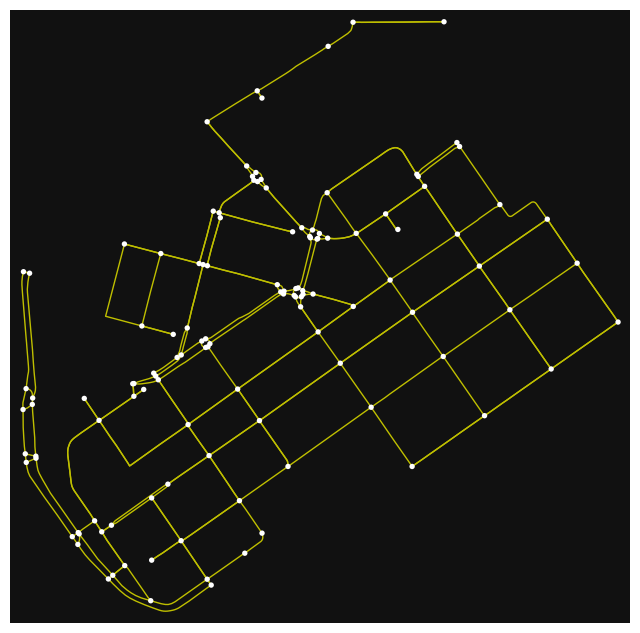

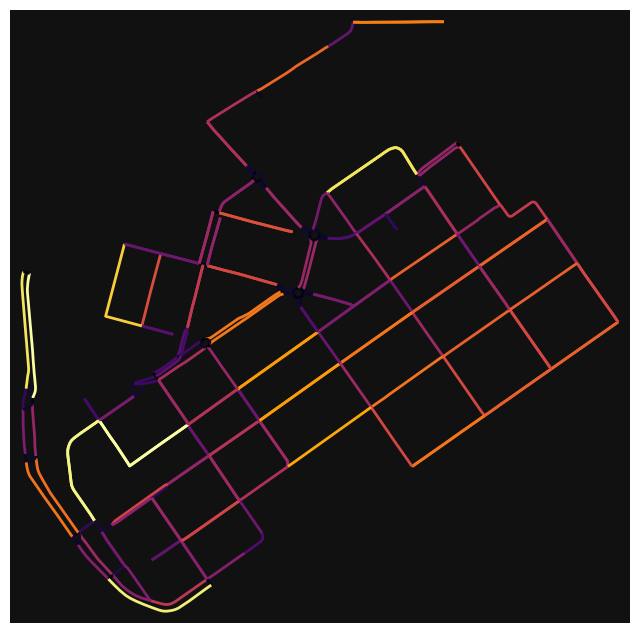

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt

place = 'Kamppi, Helsinki, Finland'
graph = ox.graph_from_place(place,network_type='drive')

print(type(graph))
fig, ax = ox.plot_graph(graph,edge_color='y')


ec = ox.plot.get_edge_colors_by_attr(graph, 'length', cmap='inferno')
fig, ax = ox.plot_graph(graph, edge_color=ec, edge_linewidth=2, node_size=0)


In [5]:
g = nx.DiGraph(graph)

In [11]:
      
hf.nastavi_ct(g,c_mode=2)
    

    
# plt.hist([l[i][2]["highway"] for i in range(len(l))])
# set([l[i][2]["highway"] for i in range(len(l))])
# LIST_OF_ROAD_TYPES = ['motorway','trunk','primary','primary_link','secondary','tertiary','unclassified','living_street','residential']
#ec = ox.plot.get_edge_colors_by_attr(g, 'c', cmap='inferno')
#fig, ax = ox.plot_graph(g, edge_color=ec, edge_linewidth=2, node_size=0)



In [15]:
list(g.edges(data=True))[0]

(25216594,
 1372425714,
 {'osmid': 23856784,
  'oneway': True,
  'lanes': '2',
  'name': 'Mechelininkatu',
  'highway': 'primary',
  'maxspeed': 40,
  'reversed': False,
  'length': 40.885,
  'geometry': <LINESTRING (24.921 60.165, 24.921 60.165, 24.921 60.165, 24.921 60.165, 24....>,
  'c': 2,
  't': 40.885})

In [7]:

# 0:
# 25291537
# 1:
# 25291565
# for e in g.edges():
#     if g.edges[e]["oneway"] == False:
#         pass
# ta je oneway = False in istocasno je podvojen tko da ne rabm podvajat
#print((25291537,25291565) in g.edges())
#(25291565,25291537) in g.edges()

In [12]:
ZK = [(25216594,3177642345,1),(2037356632,25238874,1),(56115897, 56113314, 1)]
ZK = hf.get_random_ZK(g,num_ZK=5,max_a=1)
print(ZK)

[(1371751507, 1372459287, 1), (529507771, 25291591, 1), (1372233754, 25291537, 1), (724233143, 1371750095, 1), (57743854, 301360197, 1)]


In [12]:
paths = hf.poklici_linprog(ZK,g,st_alternativ=10)
paths

5021.784 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -0.  1.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.] Optimization terminated successfully. (HiGHS Status 7: Optimal)


[[25291565,
  1377211666,
  1377211668,
  1371750095,
  1377211667,
  1371750094,
  1371751501,
  979855770,
  1371751516,
  949775435,
  282730985,
  1973739965,
  282730959,
  282730717,
  282730727],
 [150983569, 1371750099, 1371750095, 1377211668, 60170471],
 [2037356632,
  56113314,
  846597954,
  846597959,
  267117317,
  846597945,
  301360197,
  1372441183,
  1372376956,
  56116937,
  60004721,
  268177652,
  1007980689,
  1372425705,
  175832743,
  159619609],
 [282730739,
  282730985,
  949775435,
  1371751507,
  1371751505,
  846597954,
  846597959,
  724233172,
  724233143,
  1861896890,
  1861896883,
  337264937,
  1861896877,
  1861896879],
 [282730739,
  1973739965,
  282730959,
  282730717,
  282730727,
  1372459287,
  1378064355,
  60278325,
  56115897,
  60072524,
  267117319,
  724233143,
  1861896890,
  1861896883,
  337264937,
  1861896877,
  1861896879],
 [1372233754,
  1372376937,
  1372376956,
  1372441183,
  301360197,
  846597947,
  2037356632,
  56113314,
  9

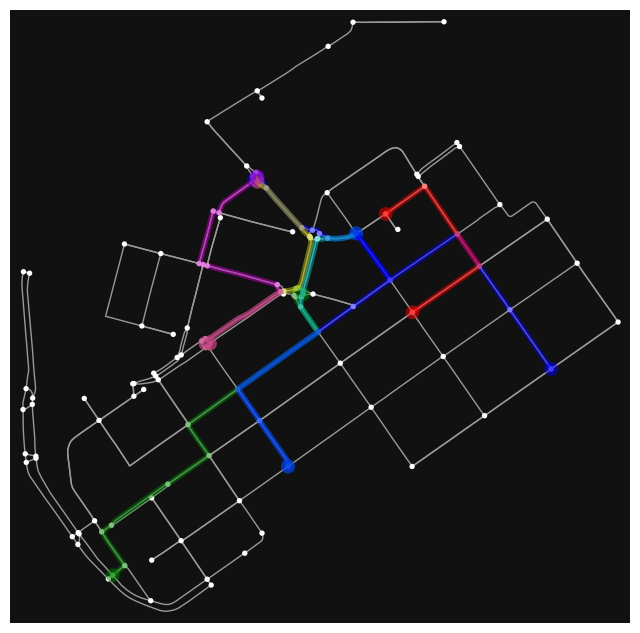

In [13]:
fig, ax = ox.plot_graph_routes(graph,paths,route_colors=list(COLORS)[:len(paths)])
# for ci, path in enumerate(paths):
#     fig, ax = ox.plot_graph_route(graph,path,route_color=COLORS[ci])

In [13]:
ZK = hf.get_random_ZK(g,num_ZK=5,max_a=2)
print(ZK)

[(337264937, 25291564, 2), (266159806, 319885318, 1), (25216594, 1372459287, 2), (282730717, 1371750094, 1), (1372376937, 282730959, 2)]


In [14]:
_,_,t,c,_ = hf.sestavi_QBtca(ZK, g)
print(t)
print(c)

[40.885, 16.601, 25.190000000000005, 242.47600000000003, 139.09, 156.786, 170.448, 157.43200000000002, 138.135, 139.05700000000004, 157.43200000000002, 156.786, 103.75600000000003, 169.89499999999998, 170.448, 175.20899999999997, 113.452, 114.35199999999999, 70.02199999999999, 103.17999999999999, 11.004, 7.988, 8.447, 125.89699999999999, 117.54600000000002, 243.68300000000002, 72.231, 103.823, 62.58500000000001, 118.20400000000001, 104.75699999999999, 96.566, 72.23100000000001, 175.209, 144.23399999999998, 62.585, 8.447, 139.55800000000002, 95.86399999999999, 159.024, 102.46, 156.529, 170.31300000000002, 75.619, 7.988, 76.35799999999999, 104.605, 38.976, 25.21, 235.802, 16.61, 2.273, 24.257, 23.045, 24.256999999999998, 81.60499999999999, 23.045, 100.10399999999998, 41.617999999999995, 38.739, 91.96000000000001, 68.001, 11.101, 29.649, 102.92099999999999, 78.818, 29.649, 68.012, 88.989, 21.075, 2.983, 124.51200000000003, 89.644, 13.667, 88.155, 13.667, 3.879, 15.934, 139.558, 135.039, 9

[0. 0. 2. ... 0. 0. 0.] 7053.443 Optimization terminated successfully. (HiGHS Status 7: Optimal)
[[ 0.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 ...
 [-0.  0.  0. -0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


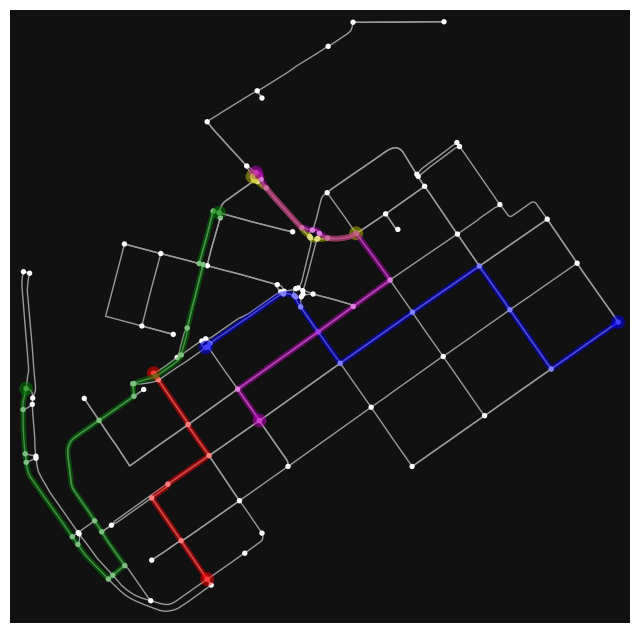

In [15]:
from scipy.optimize import linprog
f,B,c,M2,m_ZK = hf.nastavi_fbcmm(g,ZK,c,t)
res = linprog(f, A_ub=B, b_ub=c, A_eq=M2, b_eq=m_ZK, integrality=1)
print(res.x,res.fun,res.message)
X = np.array(res.x).reshape(g.number_of_edges(),len(ZK))
paths = hf.columns_to_paths(g,X)
print(X)
# path0 = hf.nodes_to_edges_path(hf.binary_vector_to_edges(X[:,0],g.edges()), inverse=True)
# fig, ax = ox.plot_graph_route(graph,path0)
fig, ax = ox.plot_graph_routes(graph,paths,route_colors=list(COLORS)[:len(paths)])
# for ci, path in enumerate(paths):
#     fig, ax = ox.plot_graph_route(graph,path,route_color=COLORS[ci])
#TODO, mislm da ne dela capacity
#X[X>0]

In [18]:
c

[40.885,
 16.601,
 25.190000000000005,
 242.47600000000003,
 139.09,
 156.786,
 170.448,
 157.43200000000002,
 138.135,
 139.05700000000004,
 157.43200000000002,
 156.786,
 103.75600000000003,
 169.89499999999998,
 170.448,
 175.20899999999997,
 113.452,
 114.35199999999999,
 70.02199999999999,
 103.17999999999999,
 11.004,
 7.988,
 8.447,
 125.89699999999999,
 117.54600000000002,
 243.68300000000002,
 72.231,
 103.823,
 62.58500000000001,
 118.20400000000001,
 104.75699999999999,
 96.566,
 72.23100000000001,
 175.209,
 144.23399999999998,
 62.585,
 8.447,
 139.55800000000002,
 95.86399999999999,
 159.024,
 102.46,
 156.529,
 170.31300000000002,
 75.619,
 7.988,
 76.35799999999999,
 104.605,
 38.976,
 25.21,
 235.802,
 16.61,
 2.273,
 24.257,
 23.045,
 24.256999999999998,
 81.60499999999999,
 23.045,
 100.10399999999998,
 41.617999999999995,
 38.739,
 91.96000000000001,
 68.001,
 11.101,
 29.649,
 102.92099999999999,
 78.818,
 29.649,
 68.012,
 88.989,
 21.075,
 2.983,
 124.51200000000

seed - notes
13 - No path between 60069401 and 25416263.

In [46]:
p = pr.Problem(graph, None, ZK = None, ZK_shape=(5,2), ZK_seed = 19, c_mode = 1, t_mode= "time")
p.solve(mode="linprog_v1")
# TODO debug

ZK_seed: 19
living_street is set to 30
living_street is set to 30
residential is set to 30
residential is set to 30
living_street is set to 30
living_street is set to 30
The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)


In [64]:
# for i in range(20,30):
#     res = None
#     for j in [1,2]:
        
#         try:
#             p = pr.Problem(graph, None, ZK = None, ZK_shape=(3,2), ZK_seed = i, c_mode = j, t_mode= "time")
#             p.solve(mode="linprog_v1")
        
#             if res is None:
#                 res = p.results["linprog_v1"]["success"]
#             else:
#                 if res == p.results["linprog_v1"]["success"] and res == True:
#                     print(i)
#         except Exception:
#             pass

ZK_seed: 20
ZK_seed: 20
20
ZK_seed: 21
ZK_seed: 21
ZK_seed: 22
ZK_seed: 22
ZK_seed: 23
ZK_seed: 23
ZK_seed: 24
ZK_seed: 24
24
ZK_seed: 25
ZK_seed: 25
25
ZK_seed: 26
ZK_seed: 26
ZK_seed: 27
ZK_seed: 27
ZK_seed: 28
ZK_seed: 28
ZK_seed: 29
ZK_seed: 29
